Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

First, load the dataset.

Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.


In [23]:
import pandas as pd
from titlecase import titlecase

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats.mstats import winsorize
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sqlalchemy import create_engine

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy',con=engine)
engine.dispose()

In [3]:
# Cleaning up the leadning and following spaces from the column headers
df.columns = df.columns.str.strip()

# Giving some proper caseing to the column names
df.columns = [titlecase(x) if x.isupper() != True else x for x in df.columns]

In [4]:
#v Displaying the nulls
nans = lambda df: df[df.isnull().any(axis=1)]
def set_pandas_display_options() -> None:
    # Ref: https://stackoverflow.com/a/52432757/
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = None
    # display.precision = 2  # set as needed

set_pandas_display_options()
nans(df)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,BMI,Under-Five Deaths,Polio,Total Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition of Resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
37,Côte d'Ivoire,2001,Developing,47.8,467.0,65,3.15,0.000000,1.0,5790,19.9,94,7.0,4.85,66.0,7.0,NaN,NaN,7.9,7.9,NaN,NaN
45,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,47.0,23,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
46,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,46.1,23,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
47,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,45.3,24,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,17.6,62,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,17.3,66,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,17.1,70,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8
2921,Zambia,2000,Developing,43.8,614.0,44,2.62,45.616880,NaN,30930,16.8,72,85.0,7.16,85.0,18.7,341.955625,1531221.0,7.5,7.5,0.418,9.6


In [5]:
df.isnull().sum() * 100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life Expectancy                     0.340368
Adult Mortality                     0.340368
Infant Deaths                       0.000000
Alcohol                             6.603131
Percentage Expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
Under-Five Deaths                   0.000000
Polio                               0.646698
Total Expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness  1-19 Years                1.157250
Thinness 5-9 Years                  1.157250
Income Composition of Resources     5.684139
Schooling                           5.547992
dtype: flo

c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\program files\python37\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\program files\python37\lib\site-packag

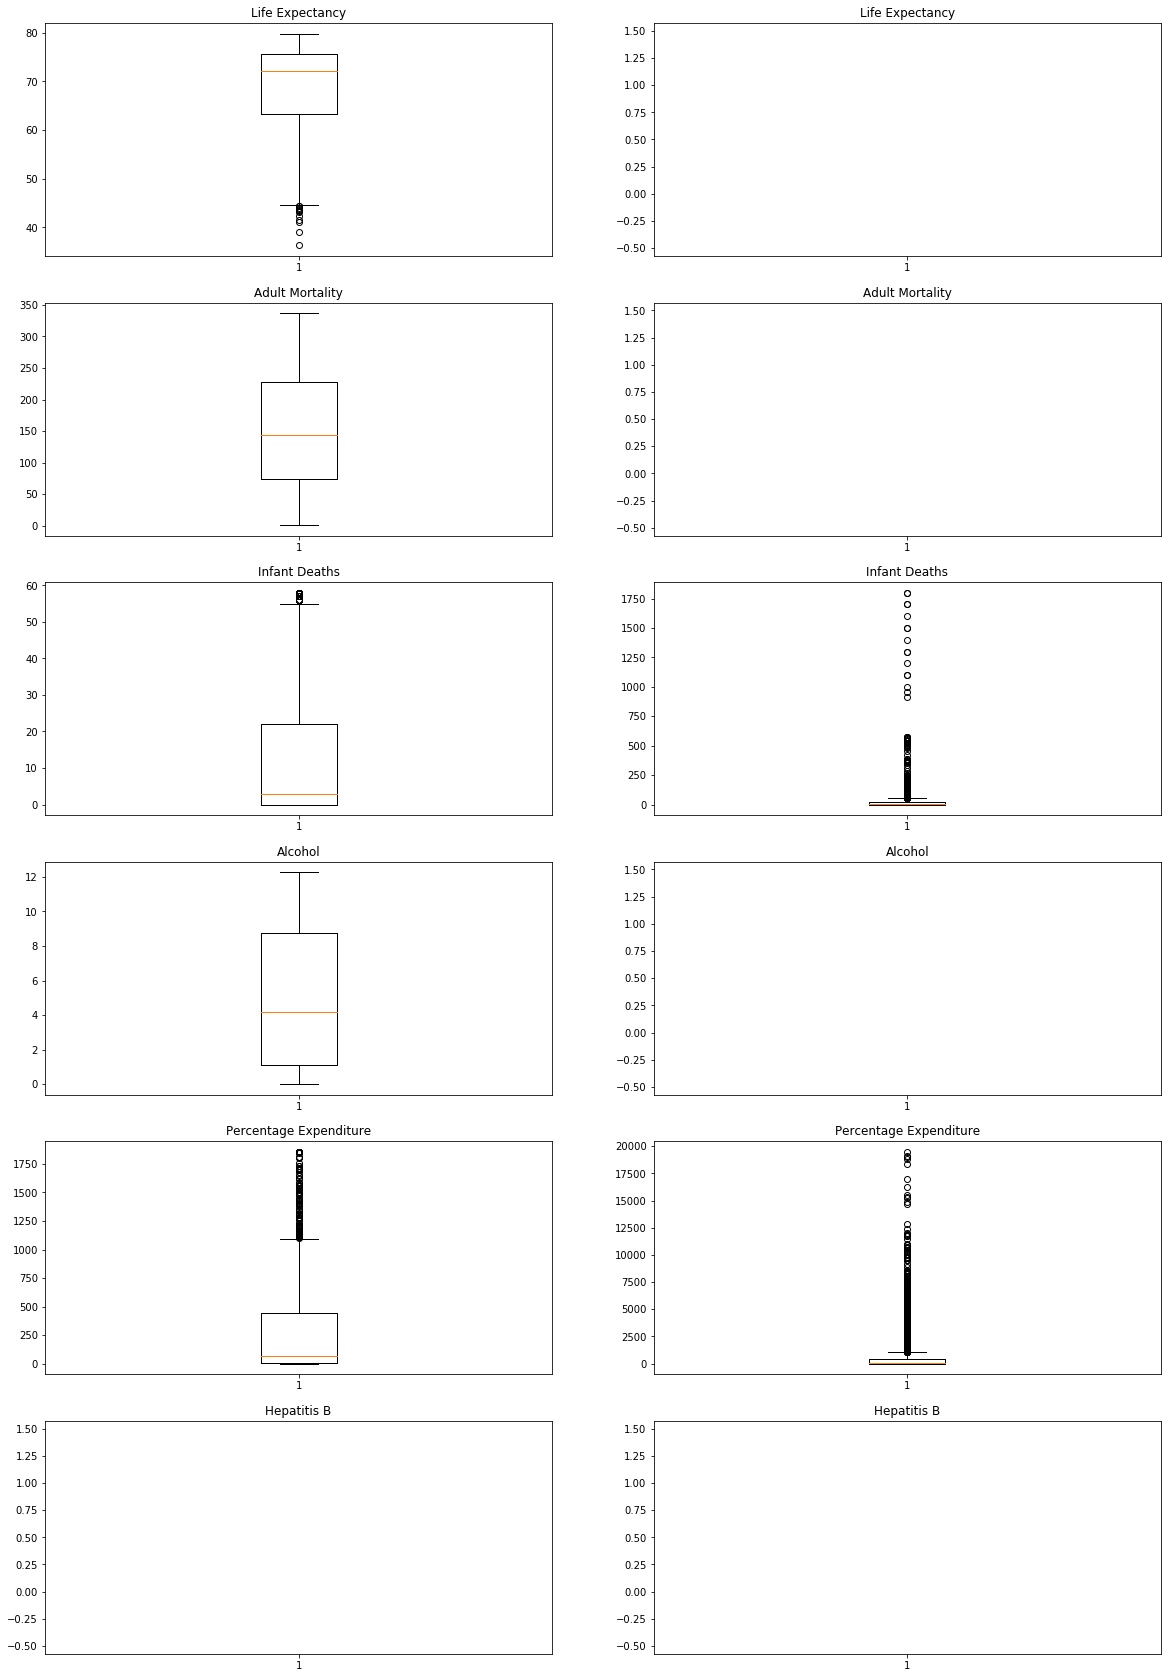

In [31]:
plt.figure(figsize=(20,30))

plt.subplot(6, 2, 1)
plt.boxplot(winsorize(df['Life Expectancy'], (0, 0.10)))
plt.title('Life Expectancy')

plt.subplot(6, 2, 2)
plt.boxplot(df['Life Expectancy'])
plt.title('Life Expectancy')

plt.subplot(6, 2, 3)
plt.boxplot(winsorize(df['Adult Mortality'], (0, 0.10)))
plt.title('Adult Mortality')

plt.subplot(6, 2, 4)
plt.boxplot(df['Adult Mortality'])
plt.title('Adult Mortality')

plt.subplot(6, 2, 5)
plt.boxplot(winsorize(df['Infant Deaths'], (0, 0.10)))
plt.title('Infant Deaths')

plt.subplot(6, 2, 6)
plt.boxplot(df['Infant Deaths'])
plt.title('Infant Deaths')

plt.subplot(6, 2, 7)
plt.boxplot(winsorize(df['Alcohol'], (0, 0.10)))
plt.title('Alcohol')

plt.subplot(6, 2, 8)
plt.boxplot(df['Alcohol'])
plt.title('Alcohol')

plt.subplot(6, 2, 9)
plt.boxplot(winsorize(df['Percentage Expenditure'], (0, 0.10)))
plt.title('Percentage Expenditure')

plt.subplot(6, 2, 10)
plt.boxplot(df['Percentage Expenditure'])
plt.title('Percentage Expenditure')

plt.subplot(6, 2, 11)
plt.boxplot(winsorize(df['Hepatitis B'], (0, 0.10)))
plt.title('Hepatitis B')

plt.subplot(6, 2, 12)
plt.boxplot(df['Hepatitis B'])
plt.title('Hepatitis B')

plt.show()

TypeError: '(slice(None, None, None), 2)' is an invalid key

With all the null data we need to fill in the blanks.  Going to fill in with interpolate.

In [6]:
# Look at the columns to see if they are null
null_cols = ['Life Expectancy', 'Adult Mortality', 'Alcohol',
            'Hepatitis B', 'BMI', 'Polio', 'Total Expenditure',
            'Diphtheria', 'GDP', 'Population', 'Thinness  1-19 Years',
            'Thinness 5-9 Years', 'Income Composition of Resources', 
            'Schooling']
df2 = df.copy()

# Fill in the null values of the columns
for col in null_cols:
    df2.loc[:, col] = df2.loc[:, col].interpolate()

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life Expectancy                    2938 non-null float64
Adult Mortality                    2938 non-null float64
Infant Deaths                      2938 non-null int64
Alcohol                            2938 non-null float64
Percentage Expenditure             2938 non-null float64
Hepatitis B                        2938 non-null float64
Measles                            2938 non-null int64
BMI                                2938 non-null float64
Under-Five Deaths                  2938 non-null int64
Polio                              2938 non-null float64
Total Expenditure                  2938 non-null float64
Diphtheria                         2938 non-null float64
HIV/AIDS                           2938 non-null

In [12]:
df.isnull().sum() * 100/df.isnull().count()

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life Expectancy                     0.340368
Adult Mortality                     0.340368
Infant Deaths                       0.000000
Alcohol                             6.603131
Percentage Expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
BMI                                 1.157250
Under-Five Deaths                   0.000000
Polio                               0.646698
Total Expenditure                   7.692308
Diphtheria                          0.646698
HIV/AIDS                            0.000000
GDP                                15.248468
Population                         22.191967
Thinness  1-19 Years                1.157250
Thinness 5-9 Years                  1.157250
Income Composition of Resources     5.684139
Schooling                           5.547992
dtype: flo